In [1]:
#multi_agent.ipynb
#
#by Joe Hahn
#jmh.datasciences@gmail.com
#12 February 2018
#
#This uses Q-learning on multiple agents to demonstrate something...

In [2]:
#game settings
N_agents = 6                #number of agents
N_buckets = 60              #number of buckets
max_turns = 10*N_agents     #max number of moves in single game...each agent moves 10 times per game
weather = True              #set=True to turn on weather effects
rn_seed = 16                #seed for random number generator

In [3]:
#import game
from multi_agent import *
import time
time_start = time.time()

In [4]:
#import plotting libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5, font='DejaVu Sans')

In [5]:
#initialize environment
environment = initialize_environment(rn_seed, max_turns, N_buckets, N_agents)
print 'environment = ', environment

environment =  {'max_turns': 60, 'rn_seed': 16, 'N_agents': 6, 'bucket_params': {'p0': array([ 0.        ,  0.00033898,  0.00067797,  0.00101695,  0.00135593,
        0.00169492,  0.0020339 ,  0.00237288,  0.00271186,  0.00305085,
        0.00338983,  0.00372881,  0.0040678 ,  0.00440678,  0.00474576,
        0.00508475,  0.00542373,  0.00576271,  0.00610169,  0.00644068,
        0.00677966,  0.00711864,  0.00745763,  0.00779661,  0.00813559,
        0.00847458,  0.00881356,  0.00915254,  0.00949153,  0.00983051,
        0.01016949,  0.01050847,  0.01084746,  0.01118644,  0.01152542,
        0.01186441,  0.01220339,  0.01254237,  0.01288136,  0.01322034,
        0.01355932,  0.01389831,  0.01423729,  0.01457627,  0.01491525,
        0.01525424,  0.01559322,  0.0159322 ,  0.01627119,  0.01661017,
        0.01694915,  0.01728814,  0.01762712,  0.0179661 ,  0.01830508,
        0.01864407,  0.01898305,  0.01932203,  0.01966102,  0.02      ]), 'sigma': array([ 0.        ,  0.00025424,  0.00

In [6]:
#initialize state
state = initialize_state(environment)
print 'state = ', state

state =  {'previous_weather': 'nominal', 'agent_locations': array([12, 51, 40, 16, 44, 42]), 'bucket_productivity': array([  0.00000000e+00,  -2.36536326e-05,   6.55480151e-04,
         1.97679479e-03,   1.24157739e-03,   5.76540182e-04,
         1.90837386e-03,   7.22765102e-04,   3.35578698e-03,
         2.13466279e-03,   2.48839174e-03,   7.77271066e-03,
         3.86123838e-03,   9.29280507e-03,   3.04288679e-03,
         8.79902463e-03,   3.11857810e-03,   7.15754222e-03,
         9.27975979e-03,   7.69655749e-03,   1.32304863e-02,
         1.82967712e-02,   5.45908063e-03,   1.19248261e-02,
         7.64270951e-03,   1.46790163e-02,   8.38869180e-03,
         9.13993870e-03,   1.90842145e-02,   1.25892148e-02,
         1.19766789e-02,   7.94854983e-03,   1.23488421e-02,
        -2.02102860e-04,   1.95988028e-02,   1.99377350e-02,
         1.36113497e-02,   7.85068295e-03,   1.05123247e-02,
         4.62377068e-02,   1.41964804e-02,  -6.35405691e-03,
         2.28217024e-02,   6.5

In [7]:
#show that weather can change as agents move
state = initialize_state(environment)
agent = 0
action = 0
while (False):
    state_next = update_agents(state, agent, action, environment)
    weather = state_next['weather']
    agent +=1
    if (agent >= N_agents): agent = 0
    state = copy.deepcopy(state_next)
    if (weather != 'nominal'): break
print 'state = ', state
state_vector = state2vector(state, environment)
print 'state_vector = ', state_vector
state['previous_weather'] = 'hot'
print state2vector(state, environment)

state =  {'previous_weather': 'nominal', 'agent_locations': array([24, 54, 18, 24, 48, 12]), 'bucket_productivity': array([ 0.        ,  0.00037547,  0.00057638,  0.00059724,  0.00126365,
        0.00366105,  0.00393352,  0.00303653,  0.00233286,  0.00518427,
        0.00646297,  0.00489354,  0.0072323 ,  0.00084572,  0.00508384,
        0.00081285,  0.00059383,  0.00477852,  0.00055822,  0.01176974,
        0.01107304,  0.01645   ,  0.01253731,  0.00420919,  0.00628158,
        0.01006466,  0.01185172,  0.00451233,  0.01752317,  0.00935619,
        0.01189763,  0.0218879 ,  0.01598833,  0.02195937,  0.01968219,
       -0.00359568,  0.01348419,  0.00666568,  0.01020671,  0.02612454,
        0.01484458, -0.0002995 ,  0.01626735,  0.02372825,  0.02043439,
        0.02148316,  0.03006431,  0.0349238 ,  0.00833912,  0.01699833,
       -0.00133148, -0.00725637,  0.00921933,  0.03128013,  0.01252719,
        0.00955145,  0.01376474,  0.01267311,  0.01869868,  0.05017884]), 'weather': 'nomina

In [8]:
#move an agent
agent = 1
action = 4
state = initialize_state(environment)
print 'state = ', state
state_next = update_agents(state, agent, action, environment)
print 'state_next = ', state_next
reward = get_reward(state_next)
print 'reward = ', reward
turn = 0
game_state = get_game_state(turn, environment)
print 'game_state = ', game_state
state_vector_next = state_vector = state2vector(state_next, environment)
print 'state_vector_next = ', state_vector_next

state =  {'previous_weather': 'nominal', 'agent_locations': array([46, 42, 22, 21,  6, 18]), 'bucket_productivity': array([ 0.        ,  0.00089839,  0.00207718,  0.00085249,  0.0007792 ,
        0.00103202,  0.00075907,  0.00491293,  0.00305401,  0.00063749,
        0.00285901,  0.00273329,  0.00023414,  0.00902738, -0.00203205,
        0.01521068,  0.00327306,  0.00908213,  0.0075104 ,  0.00142443,
        0.00211247,  0.006548  ,  0.01884542,  0.00397253,  0.00653118,
        0.00798918,  0.01765746,  0.00765243,  0.00765902,  0.00864104,
        0.01087407,  0.0111504 ,  0.01152381,  0.01346307,  0.02068403,
       -0.00567191,  0.02771729,  0.03121082,  0.01515258, -0.01103991,
       -0.00401128,  0.01125774,  0.01804283,  0.02054721,  0.02209481,
        0.03810226,  0.01309191,  0.04208321,  0.02020469,  0.01673444,
        0.01186416,  0.00463521,  0.01354236,  0.02148995,  0.03492339,
        0.01266478,  0.01353271,  0.00347217,  0.01077594,  0.0094193 ]), 'weather': 'nomina

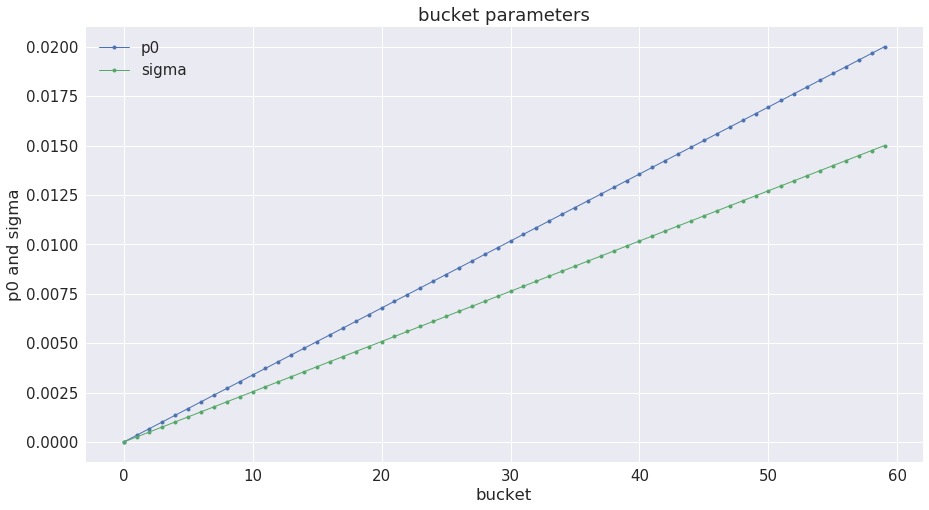

In [9]:
#plot p0 and sigma:
p0 = environment['bucket_params']['p0']
sigma = environment['bucket_params']['sigma']
xp = np.arange(len(p0))
yp = p0
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('bucket parameters')
p = ax.set_xlabel('bucket')
p = ax.set_ylabel('p0 and sigma')
p = ax.plot(xp, yp, linewidth=1, marker='o', markersize=4, label='p0')
yp = sigma
p = ax.plot(xp, yp, linewidth=1, marker='o', markersize=4, label='sigma')
p = ax.legend()

In [10]:
#play one game of randomly-moving agents and stash history in dataframe
strategy = 'random'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
print 'number of memories = ', len(memories)
reward_history.head()

number of memories =  61


,turn,weather,action,reward,agent_value_0,agent_value_1,agent_value_2,agent_value_3,agent_value_4,agent_value_5
0,0,nominal,29,6.038088,1.010384,1.001524,1.010300,1.013103,1.002331,1.000447
1,1,nominal,37,6.096435,1.025162,1.022833,1.015626,1.030192,1.001675,1.000947
2,2,nominal,3,6.127233,1.041348,1.018688,1.017830,1.043810,1.004195,1.001362
3,3,nominal,20,6.157187,1.053248,1.028788,1.018585,1.050112,1.004783,1.001672
4,4,nominal,33,6.200103,1.068092,1.034259,1.019489,1.056914,1.019126,1.002222


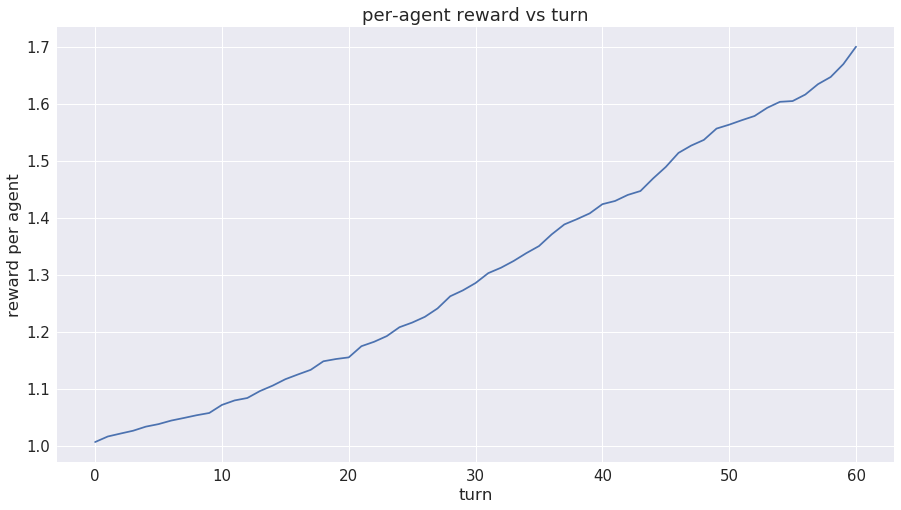

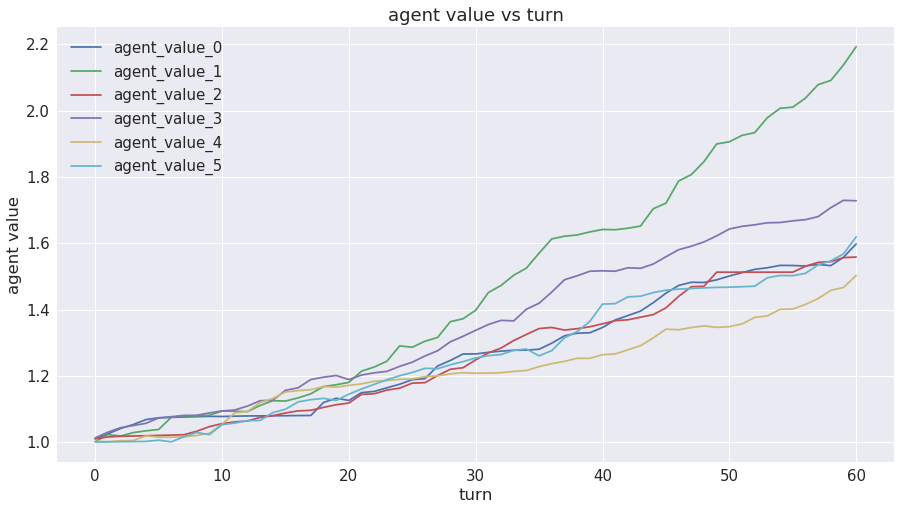

In [11]:
#plot per-agent reward versus turn, and agent values vs turn
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp)
#plot agents value versus turn
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('agent value vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('agent value')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

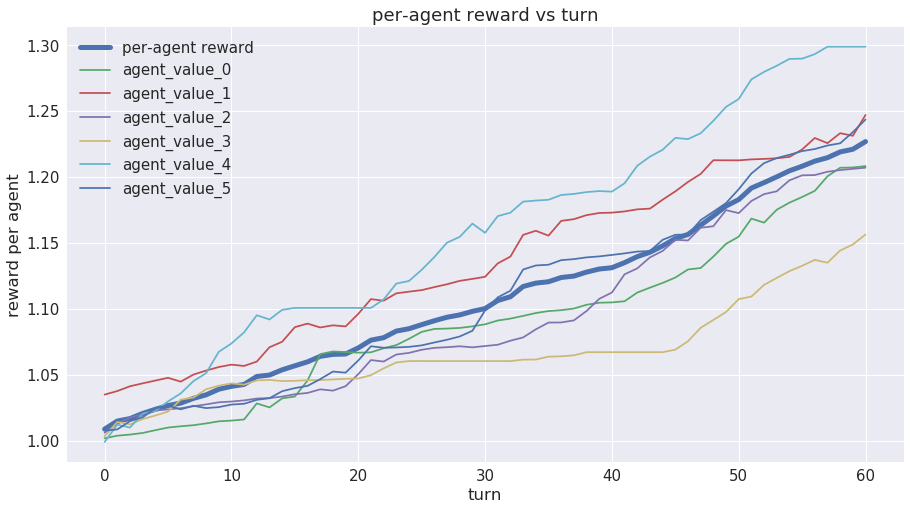

In [12]:
#play a low-risk, low-reward game with all agents moving randomly among the lower third of buckets
strategy = 'low'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp, linewidth=5, label='per-agent reward')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

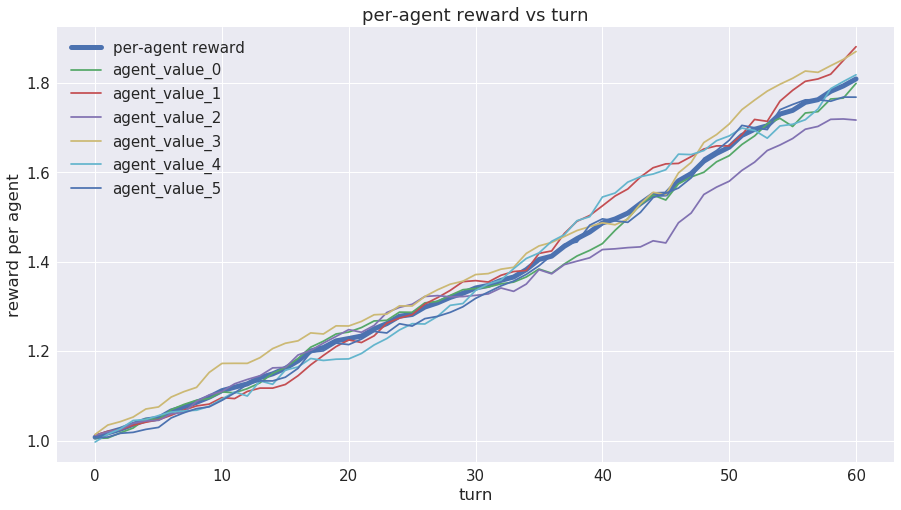

In [13]:
#play a middle-risk, middle-reward game with all agents moving randomly among the middle third of buckets
strategy = 'middle'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp, linewidth=5, label='per-agent reward')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

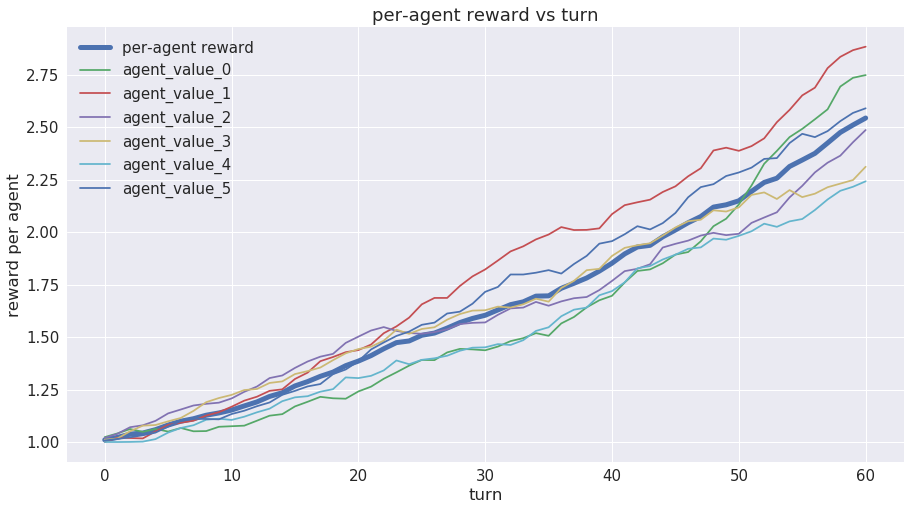

In [14]:
#play a high-risk, high-reward game with all agents moving randomly among the upper third of buckets
strategy = 'high'
memories = play_game(environment, strategy)
reward_history = memories2timeseries(memories, environment)
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp, linewidth=5, label='per-agent reward')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()

In [15]:
#play 20 games using various strategies, and generate stats for each strategy
N_games = 30
strategies = ['low', 'middle', 'high']#, 'best']
reward_histories = pd.DataFrame()
for strategy in strategies:
    print 'strategy = ', strategy 
    for game in range(N_games):
        memories = play_game(environment, strategy)
        reward_history = memories2timeseries(memories, environment)
        reward_history['strategy'] = strategy
        reward_history['game'] = game
        reward_histories = reward_histories.append(reward_history)
game_stats = reward_histories.groupby(['strategy', 'turn'], as_index=False)['reward'].agg(['mean', 'std'])
game_stats['std'] /= np.sqrt(N_games - 1)
game_stats.tail()

strategy =  low
strategy =  middle
strategy =  high


mean       std
strategy turn                     
middle   56    10.692702  0.070510
         57    10.793234  0.071037
         58    10.906154  0.069961
         59    11.024334  0.071084
         60    11.142346  0.073119

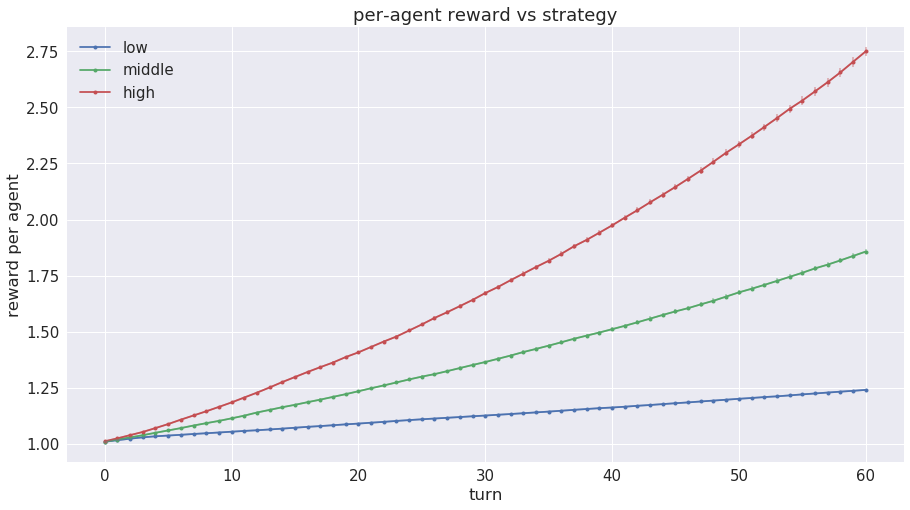

In [16]:
#plot average agent value vs turn, for each strategy
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs strategy')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
for strategy in strategies:
    reward = game_stats['mean'][strategy]
    std = game_stats['std'][strategy]
    std /= N_agents
    reward /= N_agents
    xp = reward.index
    yp = reward.values
    err = std.values
    p = ax.plot(xp, yp, label=strategy, markersize=4, marker='o')
    ax.errorbar(xp, yp, yerr=std, alpha=0.4, color=p[0].get_color())
p = ax.legend()

In [17]:
#play 250 random games and store moves in good_memories queue
N_games = 250
strategy = 'random'
memories_list = []
N_memories = 0
for N_game in range(N_games):
    memories = play_game(environment, strategy)
    memories_list += [memories]
    N_memories += len(memories)
good_memories = deque(maxlen=N_memories)
for memories in memories_list:
    for m in memories:
        good_memories.append(m)
print 'number of memories = ', len(good_memories)

number of memories =  15250


In [18]:
#build model
state_vector = state2vector(state, environment)
N_inputs = state_vector.shape[1]
N_outputs = N_buckets
N_neurons = 3*N_buckets
model = mlp_model(N_inputs, N_neurons, N_outputs)
print 'N_agents = ', N_agents
print 'N_buckets = ', N_buckets
print 'N_inputs = ', N_inputs
print 'N_neurons = ', N_neurons
print model.summary()

Using TensorFlow backend.


N_agents =  6
N_buckets =  60
N_inputs =  123
N_neurons =  180
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 180)               22320     
_________________________________________________________________
dense_2 (Dense)              (None, 90)                16290     
_________________________________________________________________
dense_3 (Dense)              (None, 60)                5460      
Total params: 44,070
Trainable params: 44,070
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
#train model
N_training_games = 500                      #number of games played during training
N_validation_games = 5                      #number of smart games played after each training game
gamma = 0.75                                #discount for future rewards
batch_size = 5*max_turns                    #number of memories used during experience-replay
debug = False                               #set True to see stats about each game's final turn
print 'batch_size = ', batch_size
print 'training model'
trained_model, games, epsilons, mean_validation_reward = \
    train(environment, model, N_training_games, N_validation_games, gamma, good_memories, batch_size, debug=debug)
print '\ntraining done'

batch_size =  300
training model
.

/Users/joe/miniconda2/lib/python2.7/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................... 
training done


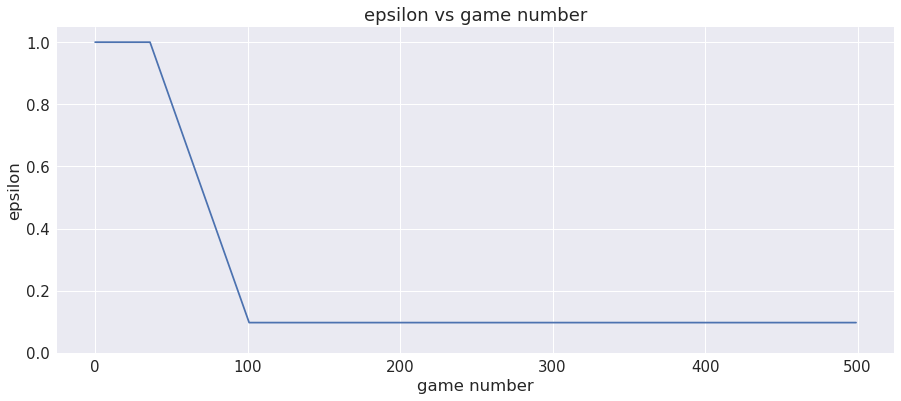

In [20]:
#plot epsilon vs game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = games
yp = epsilons
p = ax.plot(xp, yp)
p = ax.set_title('epsilon vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('epsilon')
p = ax.set_ylim(0.0, 1.05)

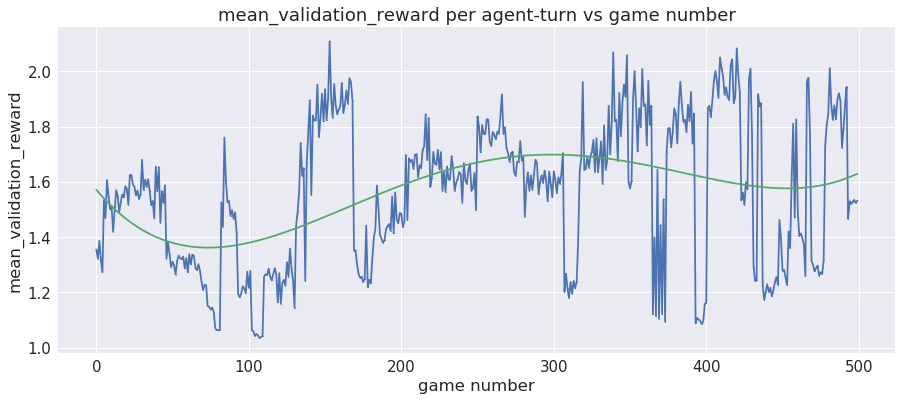

In [21]:
#plot median_validation_rewards vs validation game_number
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = games
yp = mean_validation_reward/N_agents/max_turns
p = ax.plot(xp, yp, marker='o', linestyle='-', markersize=1)
p = ax.set_title('mean_validation_reward per agent-turn vs game number')
p = ax.set_xlabel('game number')
p = ax.set_ylabel('mean_validation_reward')
import numpy.polynomial.polynomial as poly
coefs = poly.polyfit(xp, yp, 4)
yp_fit = poly.polyval(xp, coefs)
p = ax.plot(xp, yp_fit)

In [22]:
#play smart game using trained model to select best action
strategy = 'smart'
memories = play_game(environment, strategy, model=model)
reward_history = memories2timeseries(memories, environment)
reward_history.head(10)

,turn,weather,action,reward,agent_value_0,agent_value_1,agent_value_2,agent_value_3,agent_value_4,agent_value_5
0,0,nominal,39,6.059536,1.002302,1.012580,1.002302,1.006372,1.002248,1.033734
1,1,nominal,39,6.169537,1.021191,1.031663,1.021191,1.010118,1.005402,1.079971
2,2,nominal,39,6.221221,1.034813,1.045424,1.034813,1.013837,1.008544,1.083791
3,3,nominal,39,6.351046,1.052949,1.063746,1.052949,1.031606,1.011588,1.138208
4,4,nominal,39,6.485194,1.072402,1.083398,1.072402,1.050664,1.030276,1.176053
5,5,nominal,39,6.625019,1.095523,1.106757,1.095523,1.073317,1.052490,1.201409
6,6,nominal,39,6.672772,1.103420,1.114734,1.103420,1.081053,1.060076,1.210069
7,7,nominal,39,6.802842,1.124928,1.136464,1.124928,1.102126,1.080740,1.233656
8,8,nominal,39,6.863046,1.134884,1.146521,1.134884,1.111879,1.090304,1.244574
9,9,nominal,39,6.872073,1.136377,1.148029,1.136377,1.113342,1.091738,1.246211


nominal 61
stormy 0
hot 0


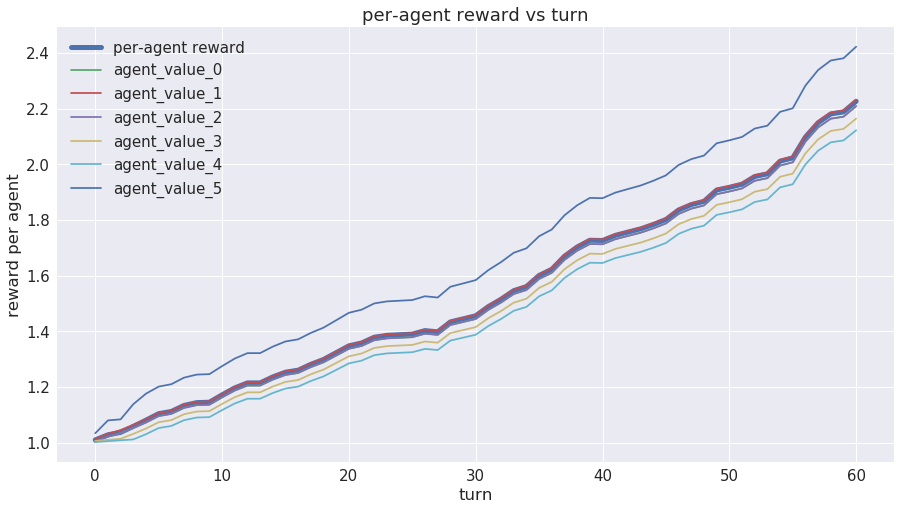

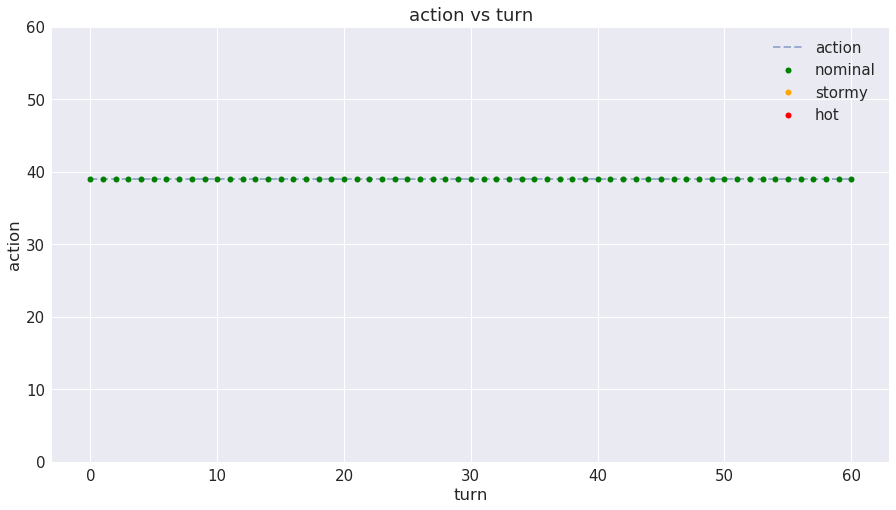

In [23]:
#plot agents value versus turn
df = reward_history
xp = df['turn']
yp = df['reward']/N_agents
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('reward per agent')
p = ax.plot(xp, yp, linewidth=5, label='per-agent reward')
for col in df.columns:
    if ('agent_value_' in col):
        yp = df[col]
        p = ax.plot(xp, df[col], label=col)
p = ax.legend()
#plot action vs turn
xp = df['turn']
yp = df['action']
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('action vs turn')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('action')
p = ax.set_ylim(0, N_buckets)
p = ax.plot(xp, yp, linewidth=2, linestyle='--', alpha=0.5, label='action')
colors = ['green', 'orange', 'red']
weathers = ['nominal', 'stormy', 'hot']
for idx in range(len(weathers)):
    weather = weathers[idx]
    color = colors[idx]
    jdx = (df['weather'] == weather)
    xp = df[jdx]['turn']
    yp = df[jdx]['action']
    p = ax.plot(xp, yp, marker='o', markersize=6, color=color, linestyle='none', label=weather)
    print weather, jdx.sum()
p = ax.legend()
#yp.values[-10:]

strategy =  low
strategy =  middle
strategy =  random
strategy =  high
strategy =  smart
strategy =  best


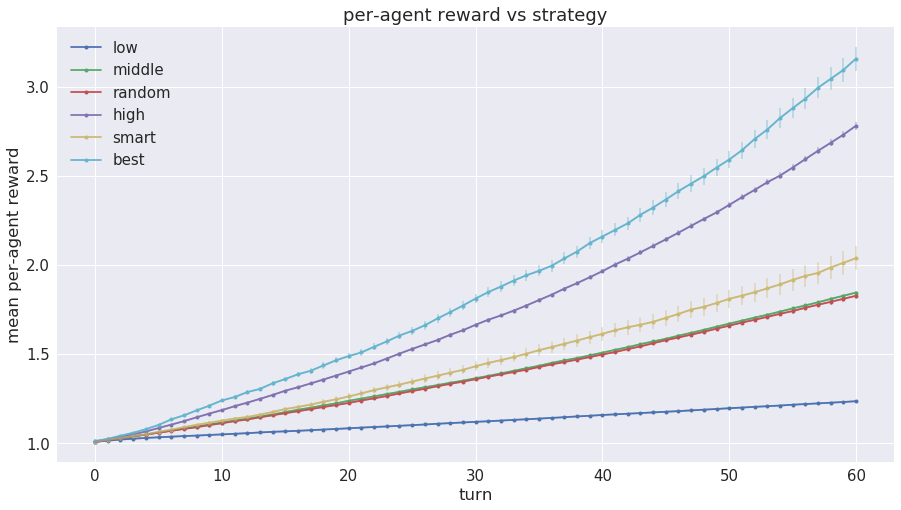

In [24]:
#play 30 games using various strategies and plot outcomes
N_games = 30
strategies = ['low', 'middle', 'random', 'high', 'smart', 'best']
reward_histories = pd.DataFrame()
for strategy in strategies:
    print 'strategy = ', strategy 
    for game in range(N_games):
        memories = play_game(environment, strategy, model=model)
        reward_history = memories2timeseries(memories, environment)
        reward_history['strategy'] = strategy
        reward_history['game'] = game
        reward_histories = reward_histories.append(reward_history)
game_stats = reward_histories.groupby(['strategy', 'turn'], as_index=False)['reward'].agg(['mean', 'std'])
game_stats['std'] /= np.sqrt(N_games - 1)
fig, ax = plt.subplots(1,1, figsize=(15, 8))
p = ax.set_title('per-agent reward vs strategy')
p = ax.set_xlabel('turn')
p = ax.set_ylabel('mean per-agent reward')
for strategy in strategies:
    reward = game_stats['mean'][strategy]
    std = game_stats['std'][strategy]
    std /= N_agents
    reward /= N_agents
    xp = reward.index
    yp = reward.values
    err = std.values
    p = ax.plot(xp, yp, label=strategy, markersize=4, marker='o')
    ax.errorbar(xp, yp, yerr=std, alpha=0.4, color=p[0].get_color())
p = ax.legend()

In [25]:
#done! 6min on aws 4 min on laptop
time_stop = time.time()
print 'execution time (minutes) = ', (time_stop - time_start)/60.0

execution time (minutes) =  2.60480748415
